# Question 2: 

George Felobes 

Data Analyst Position at Wood Mackenzie

Import Libraries

In [1]:
import pandas as pd
import numpy as np 
import datetime as dt

A. takes IP, bi, Di, Dmin and well life as input parameters

In [2]:
IP, bi, Di, Dmin, well_life = 160, 1.5, 2.3, 0.1, 25


1. set the length of data to be well life * 12

In [3]:
mop = np.arange(1,12*25 + 1)
main_df = pd.DataFrame(mop, index=mop, columns = ["mop"])

2. apply hyperbolic formula with given parameters to calculate hyperbolic production

In [4]:
main_df["hyperbolic_prod"] = main_df["mop"].apply(lambda x: (1 + bi * Di * (x - 1)) ** (-1 / bi))

3. calculate hyperbolic decline rate

In [5]:
main_df["hyperbolic_dec_rate"] =  main_df["hyperbolic_prod"].pct_change() *-1
main_df.loc[1,"hyperbolic_dec_rate"] = 1

4. apply terminal (minimum) decline (Dmin)

In [6]:
D_min = 1 - (1 - Dmin) ** (1/12)
main_df["dec_rate"] = main_df['hyperbolic_dec_rate']
main_df.loc[main_df['hyperbolic_dec_rate'] < D_min, "dec_rate"] = D_min

5. calculate forecast production

In [7]:
# initialize forecast production initial value 
main_df.loc[1, 'forecast_prod'] = IP
for i in range(2, len(main_df)):
   main_df.loc[i, 'forecast_prod'] = main_df.loc[i - 1, 'forecast_prod'] * (1-main_df.loc[i, 'dec_rate'])


Final Step: Calculate volume

In [8]:
# Use start date and datetime package to create a new column
main_df["date"] = pd.date_range(dt.datetime(2020,1,1), periods = well_life*12, freq='m')

# Use the datetime package to multiple the forecasted production by the number of days in that month 
main_df["volume"] = main_df["forecast_prod"] * (main_df["date"].dt.daysinmonth)

<AxesSubplot:xlabel='date'>

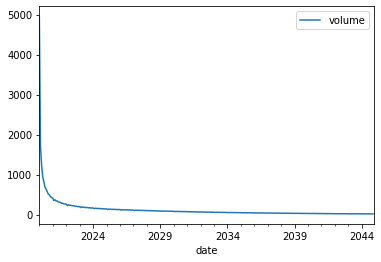

In [9]:
main_df.plot(x="date", y = "volume")